### Notebook that defines the driver degrons to be used in the excess analysis:
CONDITIONS:
- We considered a driver degron if it founds significant by two signals of positive selection (Q-VALUE <= 0.25)


In [1]:
import os 
import pandas as pd
import numpy as np
pd.options.display.max_columns=100
import glob

In [2]:
# base
base="../../../" 
# Degrons
output_combined_information = os.path.join(base,"data","table_positive_selection.tsv.gz")
# De-novo
path_output_denovo = os.path.join(base,"data","smdeg_degrons_denovo_tcga_penta.tsv")
# output files
path_hotspots = os.path.join(base,"external")
path_hotspots_taylor = os.path.join(path_hotspots,"publication_hotspots.tsv")
path_hotspots_boutros = os.path.join(path_hotspots,"inline-supplementary-material-3.xlsx")
path_output_plots = os.path.join(base,"plots","Figure5")

### Download hotspots

In [124]:
!wget -P $path_hotspots https://github.com/taylor-lab/hotspots/raw/master/publication_hotspots.tsv 

--2019-06-07 10:53:21--  https://github.com/taylor-lab/hotspots/raw/master/publication_hotspots.tsv
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/taylor-lab/hotspots/master/publication_hotspots.tsv [following]
--2019-06-07 10:53:22--  https://raw.githubusercontent.com/taylor-lab/hotspots/master/publication_hotspots.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.132.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.132.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39838 (39K) [text/plain]
Saving to: ‘/workspace/projects/ubiquitins/codereview/degradation/external/publication_hotspots.tsv’

publication_hotspot 100%[===================>]  38,90K  --.-KB/s    in 0,05s   

2019-06-07 10:53:22 (745 KB/s) - ‘/workspace/projects/ubiquiti

### Load degrons TCGA

In [125]:
# drivers degron 
df_degron_drivers = pd.read_csv(output_combined_information,sep="\t")
df_degron_drivers_tcga=df_degron_drivers[((df_degron_drivers["nearly_significant_FM_TCGA"])&(df_degron_drivers["Q_VALUE_SIM_TCGA"]<=0.25))|(df_degron_drivers["significant_FM_TCGA"])]
df_degron_drivers_tcga=df_degron_drivers_tcga[["DEGRON","START","END","Entry_Isoform","Hugo_Symbol"]].drop_duplicates()
# De novo
df_denovo_sm = pd.read_csv(path_output_denovo,sep="\t")
df_denovo_sm.rename(columns={"HUGO_SYMBOL":"Hugo_Symbol"},inplace=True)
df_denovo_sm=df_denovo_sm[df_denovo_sm["significant_SM"]][["DEGRON","START","END","Entry_Isoform","Hugo_Symbol"]].drop_duplicates()

### Similar for  CCLE

In [126]:
df_degron_drivers_ccle=df_degron_drivers[((df_degron_drivers["nearly_significant_FM_CCLE"])&(df_degron_drivers["Q_VALUE_SIM_CCLE"]<=0.25))|(df_degron_drivers["significant_FM_CCLE"])]
df_degron_drivers_ccle=df_degron_drivers_ccle[["DEGRON","START","END","Entry_Isoform","Hugo_Symbol"]].drop_duplicates()

### Combined both

In [127]:
df_total = pd.concat([df_degron_drivers_ccle,df_denovo_sm,df_degron_drivers_tcga],sort=True)

In [128]:
df_total.head()

DEGRON   END Entry_Isoform Hugo_Symbol  START
2788       SCF_FBXO31   295      P24385-1       CCND1    287
2923       SCF_FBXO31   292      P30281-1       CCND3    284
8278   DEG_SCF_FBW7_1    20      Q8NBB4-1      ZSCAN1     14
10674  DEG_SPOP_SBC_1   650      Q9H1B7-1     IRF2BPL    646
13322  DEG_SPOP_SBC_1  1129      A6NGG8-1     C2orf71   1125

### Compare with taylor hotspots

In [129]:
def is_in_degron(row):
    try:
        pos = int("".join(row["Codon"][1:]))
    except:
        return False
    return (row["START"]-11 <=  pos) and (row["END"]+11>=pos) # include flanking positions

In [130]:
path_hotspots_taylor

'/workspace/projects/ubiquitins/codereview/degradation/external/publication_hotspots.tsv'

In [131]:
df_hotspots_taylor = pd.read_csv(path_hotspots_taylor,sep="\t")
df_hotspots_taylor.rename(columns={"Hugo Symbol":"Hugo_Symbol"},inplace=True)
df_overlap_taylor=df_hotspots_taylor[["Hugo_Symbol","Codon"]].merge(df_total)
df_overlap_taylor["in_degron"] = df_overlap_taylor.apply(lambda row: is_in_degron(row),axis=1)

### All residues with overlap

In [132]:
df_overlap_taylor[df_overlap_taylor["in_degron"]]

Hugo_Symbol Codon             DEGRON  END Entry_Isoform  START  in_degron
52       CTNNB1   D32    DEG_SCF_TRCP1_1   37      P35222-1     32       True
53       CTNNB1   D32    DEG_SCF_TRCP1_1   37      P35222-1     32       True
54       CTNNB1   S33    DEG_SCF_TRCP1_1   37      P35222-1     32       True
55       CTNNB1   S33    DEG_SCF_TRCP1_1   37      P35222-1     32       True
56       CTNNB1   S37    DEG_SCF_TRCP1_1   37      P35222-1     32       True
57       CTNNB1   S37    DEG_SCF_TRCP1_1   37      P35222-1     32       True
58       CTNNB1   T41    DEG_SCF_TRCP1_1   37      P35222-1     32       True
59       CTNNB1   T41    DEG_SCF_TRCP1_1   37      P35222-1     32       True
60       CTNNB1   G34    DEG_SCF_TRCP1_1   37      P35222-1     32       True
61       CTNNB1   G34    DEG_SCF_TRCP1_1   37      P35222-1     32       True
62       CTNNB1   S45    DEG_SCF_TRCP1_1   37      P35222-1     32       True
63       CTNNB1   S45    DEG_SCF_TRCP1_1   37      P35222-1     32       True
68       CTNNB1   H36    DEG_SCF_TRCP1_1   37      P35222-1     32       True
69       CTNNB1   H36    DEG_SCF_TRCP1_1   37      P35222-1     32       True
70       NFE2L2   E79  DEG_Kelch_Keap1_1   82      Q16236-1     77       True
72       NFE2L2   E79  DEG_Kelch_Keap1_1   82      Q16236-1     77       True
75       NFE2L2   D29  DEG_Kelch_Keap1_2   32      Q16236-1     26       True
77       NFE2L2   D29  DEG_Kelch_Keap1_2   32      Q16236-1     26       True
78       NFE2L2   E82  DEG_Kelch_Keap1_1   82      Q16236-1     77       True
80       NFE2L2   E82  DEG_Kelch_Keap1_1   82      Q16236-1     77       True
82       NFE2L2   T80  DEG_Kelch_Keap1_1   82      Q16236-1     77       True
84       NFE2L2   T80  DEG_Kelch_Keap1_1   82      Q16236-1     77       True
86       NFE2L2   G81  DEG_Kelch_Keap1_1   82      Q16236-1     77       True
88       NFE2L2   G81  DEG_Kelch_Keap1_1   82      Q16236-1     77       True
91       NFE2L2   Q26  DEG_Kelch_Keap1_2   32      Q16236-1     26       True
93       NFE2L2   Q26  DEG_Kelch_Keap1_2   32      Q16236-1     26       True
95       NFE2L2   L30  DEG_Kelch_Keap1_2   32      Q16236-1     26       True
97       NFE2L2   L30  DEG_Kelch_Keap1_2   32      Q16236-1     26       True
99       NFE2L2   G31  DEG_Kelch_Keap1_2   32      Q16236-1     26       True
101      NFE2L2   G31  DEG_Kelch_Keap1_2   32      Q16236-1     26       True
103      NFE2L2   R34  DEG_Kelch_Keap1_2   32      Q16236-1     26       True
105      NFE2L2   R34  DEG_Kelch_Keap1_2   32      Q16236-1     26       True
107       MAPK1  E322           P28482-1  332      P28482-1    308       True
108        MYCN   P44     DEG_SCF_FBW7_2   47      P04198-1     40       True
111       CCND1  P287         SCF_FBXO31  295      P24385-1    287       True
112       CCND1  P287         SCF_FBXO31  295      P24385-1    287       True
114      PIK3R1  N564           P27986-1  567      P27986-1    562       True
117      PIK3R1  K567           P27986-1  567      P27986-1    562       True
118         MYC   T73     DEG_SCF_FBW7_1   77      P01106-2     70       True
120        ARAF  S214           P10398-1  215      P10398-1    202       True

### Degrons with overlap

In [144]:
def concat(grp):
    return ",".join([str(x) for x in grp])
df_overlap_taylor[df_overlap_taylor["in_degron"]].groupby(["DEGRON","START","END","Hugo_Symbol"],as_index=False).agg({"Codon":concat}).to_csv(os.path.join(base,"data","overlap_taylor_hotspots.tsv"),sep="\t",index=False)

### Similar with boustros data

In [81]:
!wget -P $path_hotspots http://msb.embopress.org/content/msb/14/3/e7974/DC3/embed/inline-supplementary-material-3.xlsx

--2019-06-07 10:29:42--  http://msb.embopress.org/content/msb/14/3/e7974/DC3/embed/inline-supplementary-material-3.xlsx
Resolving msb.embopress.org (msb.embopress.org)... 104.16.73.12, 104.16.72.12, 104.16.74.12, ...
Connecting to msb.embopress.org (msb.embopress.org)|104.16.73.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘/workspace/projects/ubiquitins/codereview/degradation/external/inline-supplementary-material-3.xlsx’

inline-supplementar     [ <=>                ]  20,35K  --.-KB/s    in 0,001s  

2019-06-07 10:29:43 (15,9 MB/s) - ‘/workspace/projects/ubiquitins/codereview/degradation/external/inline-supplementary-material-3.xlsx’ saved [20836]



In [134]:
df_hotspots_boutros = pd.read_excel(path_hotspots_boutros,sep="\t",sheet_name="EV_1")

In [135]:
def get_position_boutros(row):
    if "_" in row["Hotspot"]:        
        return int(row["Hotspot"].split("_")[1])
    else:
        return int(row["Hotspot"].split(" ")[1])
def is_in_degron(row):
    pos = row["aa"]
    return (row["START"]-11 <=  pos) and (row["END"]+11>=pos) # include flanking positions
df_hotspots_boutros["Hugo_Symbol"] = df_hotspots_boutros.apply(lambda row: row["Hotspot"].split("_")[0],axis=1)
df_hotspots_boutros["aa"] = df_hotspots_boutros.apply(lambda row: get_position_boutros(row),axis=1)
df_overlap_boutros=df_hotspots_boutros[["Hugo_Symbol","aa"]].merge(df_total)
df_overlap_boutros["in_degron"] = df_overlap_boutros.apply(lambda row: is_in_degron(row),axis=1)

In [136]:
df_overlap_boutros[df_overlap_boutros["in_degron"]]

Hugo_Symbol   aa             DEGRON  END Entry_Isoform  START  in_degron
0       CTNNB1   32    DEG_SCF_TRCP1_1   37      P35222-1     32       True
1       CTNNB1   32    DEG_SCF_TRCP1_1   37      P35222-1     32       True
2       CTNNB1   37    DEG_SCF_TRCP1_1   37      P35222-1     32       True
3       CTNNB1   37    DEG_SCF_TRCP1_1   37      P35222-1     32       True
4       CTNNB1   41    DEG_SCF_TRCP1_1   37      P35222-1     32       True
5       CTNNB1   41    DEG_SCF_TRCP1_1   37      P35222-1     32       True
6       CTNNB1   33    DEG_SCF_TRCP1_1   37      P35222-1     32       True
7       CTNNB1   33    DEG_SCF_TRCP1_1   37      P35222-1     32       True
10      NFE2L2   79  DEG_Kelch_Keap1_1   82      Q16236-1     77       True
12      NFE2L2   79  DEG_Kelch_Keap1_1   82      Q16236-1     77       True
14       MAPK1  322           P28482-1  332      P28482-1    308       True
16        ARAF  214           P10398-1  215      P10398-1    202       True

### By DEGRON

In [146]:
df_overlap_boutros[df_overlap_boutros["in_degron"]].groupby(["DEGRON","START","END","Hugo_Symbol"],as_index=False).agg({"aa":concat})

DEGRON  START  END Hugo_Symbol                       aa
0  DEG_Kelch_Keap1_1     77   82      NFE2L2                    79,79
1    DEG_SCF_TRCP1_1     32   37      CTNNB1  32,32,37,37,41,41,33,33
2           P10398-1    202  215        ARAF                      214
3           P28482-1    308  332       MAPK1                      322

In [145]:
df_overlap_boutros[df_overlap_boutros["in_degron"]].groupby(["DEGRON","START","END","Hugo_Symbol"],as_index=False).agg({"aa":concat}).to_csv(os.path.join(base,"data","overlap_boutros_hotspots.tsv"),sep="\t",index=False)

### Make barplot of overlapping with cancer gene census

In [138]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
import statsmodels.stats.multitest as mt


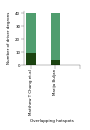

In [143]:
n_total_significant_degrons = df_total.shape[0]
n_total_degrons_overlap_taylor = df_overlap_taylor[df_overlap_taylor["in_degron"]].groupby(["DEGRON","START","END","Hugo_Symbol"],as_index=False).agg({"Codon":concat}).shape[0]
n_total_degrons_overlap_boutros = df_overlap_boutros[df_overlap_boutros["in_degron"]].groupby(["DEGRON","START","END","Hugo_Symbol"],as_index=False).agg({"aa":concat}).shape[0]
fig,ax = plt.subplots(figsize=(1,1))
ax.bar(x=[0],height=[n_total_significant_degrons],width=0.4,color="#4F9D6E")
ax.bar(x=[0],height=[n_total_degrons_overlap_taylor],width=0.4,color="#1B4411")

ax.bar(x=[1],height=[n_total_significant_degrons],width=0.4,color="#4F9D6E")
ax.bar(x=[1],height=[n_total_degrons_overlap_boutros],width=0.4,color="#1B4411")


ax.set_xticks([0,1,2])
ax.set_xticklabels(["Matthew T Chang et.al","Marija Buljan"],rotation=90,fontsize=4)
ax.set_ylabel("Number of driver degrons",fontsize=4)
ax.set_xlabel("Overlapping hotspots",fontsize=4)

ax.tick_params(axis = 'y', labelsize =4  , pad=0.5 ,width=0.25)
ax.tick_params(axis = 'x', labelsize =4  , pad=0.5 ,width=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.25)
ax.spines['bottom'].set_linewidth(0.25)
plt.savefig(path_output_plots+'/barplot_overlap_hotspots.pdf', dpi=100,bbox_inches="tight")